In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
% matplotlib inline 

In [186]:
dat_miyao = pd.read_csv('dat_miyao.csv')

In [187]:
dat_miyao=dat_miyao.set_index('date')

In [188]:
dat_miyao.head()

,d_call,l_money,l_stock,d_IIP
date,,,,
2 1978,0.016,0.881760,2.148073,-0.6
3 1978,-0.184,1.055650,4.219759,1.5
4 1978,-0.479,1.111812,1.573897,0.0
5 1978,-0.081,0.612485,-1.170687,0.2
6 1978,0.046,1.391032,1.332458,0.3


In [189]:
A_mat = np.array([[1,0,0,0], ['E',1,0,0],['E','E',1,0],['E','E','E',1]])
B_mat = np.array([['E',0,0,0], [0,'E',0,0],[0,0,'E',0],[0,0,0,'E']])

In [190]:
svar_model = sm.tsa.SVAR(dat_miyao, svar_type='AB', A=A_mat, B=B_mat)

In [191]:
svar_result =svar_model.fit(maxlags=12) 

In [192]:
svar_result.B

array([[ 0.3259268 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.25830342,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.34635981,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.1425228 ]])

In [193]:
svar_result.A

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [-0.04494578,  1.        ,  0.        ,  0.        ],
       [ 1.79668205, -4.81430194,  1.        ,  0.        ],
       [-0.12464267, -0.37635528,  0.01153748,  1.        ]])

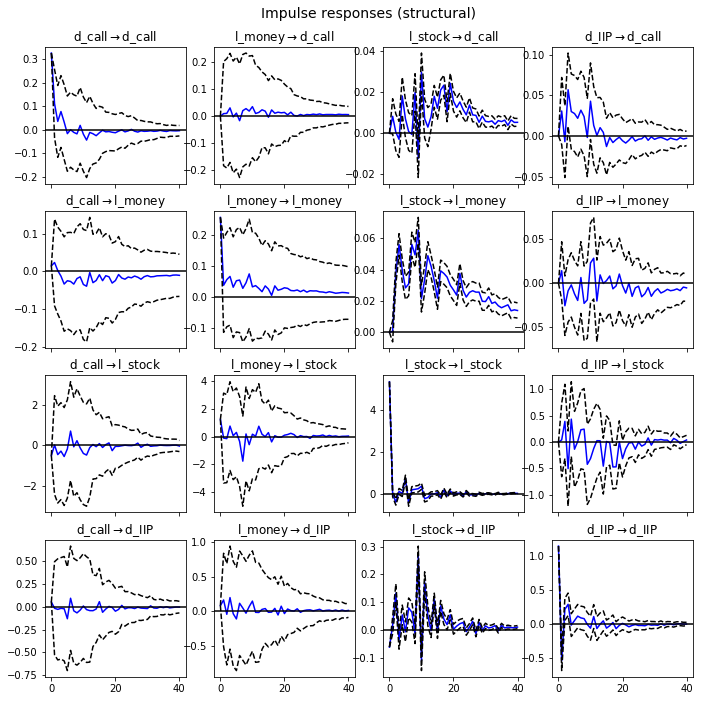

In [194]:
plt.figure(figsize=(16,10))
svar_result.irf(40).plot()
plt.savefig('miyao.png')

In [195]:
dat_update=pd.read_csv('dat_update.csv')
dat_update.set_index('date',inplace=True)

In [213]:
dat_update.tail()

,d_call,l_money,l_stock,d_IIP
date,,,,
7 2017,0.002,0.003589,-0.541812,-0.8
8 2017,0.005,0.002332,-1.409826,2.0
9 2017,-0.009,0.003857,3.550345,-1.0
10 2017,0.021,0.002515,7.818058,0.5
11 2017,-0.011,0.004959,3.189391,0.5


In [197]:
A_mat = np.array([[1,0,0,0], ['E',1,0,0],['E','E',1,0],['E','E','E',1]])
B_mat = np.array([['E',0,0,0], [0,'E',0,0],[0,0,'E',0],[0,0,0,'E']])

In [198]:
svar_model = sm.tsa.SVAR(dat_update, svar_type='AB', A=A_mat, B=B_mat)

In [200]:
svar_result =svar_model.fit(maxlags=12, maxiter=1000)

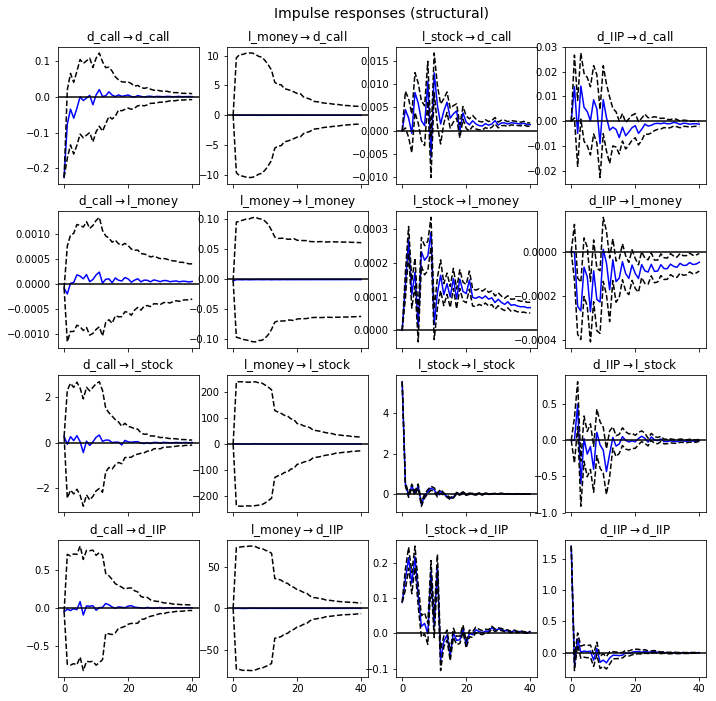

In [225]:
plt.figure(figsize=(16,10))
svar_result.irf(40).plot()
plt.savefig('update.png')

In [205]:
var_model=sm.tsa.VAR(dat_update)

In [207]:
var_result=var_model.fit(maxlags=12)

In [222]:
params=var_result.params
params['d_call']

const         -0.035500
L1.d_call      0.334544
L1.l_money     2.447206
L1.l_stock     0.000688
L1.d_IIP       0.008154
L2.d_call      0.037972
L2.l_money    -1.818150
L2.l_stock    -0.000046
L2.d_IIP      -0.004705
L3.d_call      0.198311
L3.l_money     4.406655
L3.l_stock    -0.000665
L3.d_IIP       0.007504
L4.d_call     -0.019603
L4.l_money    -5.705139
L4.l_stock     0.001028
L4.d_IIP       0.000788
L5.d_call     -0.079767
L5.l_money     4.880495
L5.l_stock    -0.000255
L5.d_IIP       0.001228
L6.d_call      0.021366
L6.l_money    -6.961480
L6.l_stock     0.000038
L6.d_IIP      -0.002366
L7.d_call     -0.023024
L7.l_money     7.901898
L7.l_stock    -0.000750
L7.d_IIP       0.004153
L8.d_call      0.004196
L8.l_money     1.542742
L8.l_stock     0.001695
L8.d_IIP       0.002712
L9.d_call      0.094558
L9.l_money     1.513838
L9.l_stock    -0.002709
L9.d_IIP      -0.006381
L10.d_call    -0.085271
L10.l_money    0.521976
L10.l_stock    0.002438
L10.d_IIP      0.005713
L11.d_call    -0

In [220]:
var_model.predict(params=params,start='1 2017', lags=12)

array([[  3.82655553e-02,   2.78868249e-03,  -1.12129326e+00,
         -2.22055603e-01],
       [ -8.10765744e-03,   3.09685845e-03,  -6.37346806e-01,
          1.31648868e+00],
       [  4.16290257e-02,   2.60988306e-03,  -1.52045270e+00,
         -7.12677701e-01],
       [ -6.25866087e-02,   3.48587898e-03,   1.94835053e+00,
          1.06441464e+00],
       [  2.13856796e-02,   2.61284799e-03,  -8.84297156e-01,
         -1.01229296e+00],
       [ -2.92249479e-02,   2.73365773e-03,   6.47440943e-01,
          9.26937588e-01],
       [  5.14567982e-02,   3.99491569e-03,  -1.85905541e+00,
         -5.48580612e-01],
       [ -7.50128678e-02,   3.55459548e-03,   1.76777487e+00,
          2.50842697e-01],
       [  6.33427246e-02,   3.56159407e-03,  -5.63400120e-01,
          4.08056587e-01],
       [ -3.82503659e-02,   1.92806969e-03,   1.99669824e+00,
          1.07222811e+00],
       [  1.69216122e-02,   4.51355892e-03,   5.35174562e-02,
         -3.62075358e-01]])